In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [89]:
original_data = pd.read_csv('raw_data/mxmh_survey_results.csv')


pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', None)

original_data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


Renaming columns and removing unneeded columns (timestamp and permissions)

In [90]:
original_data = original_data.rename(columns={
    'Frequency [Classical]': 'CLASSICAL',
    'Frequency [Country]': 'COUNTRY',
    'Frequency [EDM]': 'EDM',
    'Frequency [Folk]': 'FOLK',
    'Frequency [Gospel]': 'GOSPEL',
    'Frequency [Hip hop]': 'HIP_HOP',
    'Frequency [Jazz]': 'JAZZ',
    'Frequency [K pop]': 'K_POP',
    'Frequency [Latin]': 'LATIN',
    'Frequency [Lofi]': 'LOFI',
    'Frequency [Metal]': 'METAL',
    'Frequency [Pop]': 'POP',
    'Frequency [R&B]': 'R&B',
    'Frequency [Rap]': 'RAP',
    'Frequency [Rock]': 'ROCK',
    'Frequency [Video game music]': 'VIDEO GAME MUSIC',
    'BPM': 'BLOOD_PRESSURE'
    })
original_data = original_data.drop(['Timestamp','Permissions'], axis=1)
original_data

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BLOOD_PRESSURE,CLASSICAL,COUNTRY,EDM,FOLK,GOSPEL,HIP_HOP,JAZZ,K_POP,LATIN,LOFI,METAL,POP,R&B,RAP,ROCK,VIDEO GAME MUSIC,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


Normalizing column headings by adding underscore and making all uppercase

In [91]:
original_data_transposed = original_data.T.reset_index()
original_data_transposed['index'] = original_data_transposed['index'].str.replace(' ', '_')

original_data_transposed['index'] = original_data_transposed['index'].map(str.upper)

print(original_data_transposed)




                        index                0                1  \
0                         AGE             18.0             63.0   
1   PRIMARY_STREAMING_SERVICE          Spotify          Pandora   
2               HOURS_PER_DAY              3.0              1.5   
3               WHILE_WORKING              Yes              Yes   
4             INSTRUMENTALIST              Yes               No   
5                    COMPOSER              Yes               No   
6                   FAV_GENRE            Latin             Rock   
7                 EXPLORATORY              Yes              Yes   
8           FOREIGN_LANGUAGES              Yes               No   
9              BLOOD_PRESSURE            156.0            119.0   
10                  CLASSICAL           Rarely        Sometimes   
11                    COUNTRY            Never            Never   
12                        EDM           Rarely            Never   
13                       FOLK            Never           Rarel

Resetting the data back transposing after normalizing and renaming back to original variable name

In [92]:
reset_original_data = original_data_transposed.set_index('index').T

original_data = reset_original_data
original_data


index,AGE,PRIMARY_STREAMING_SERVICE,HOURS_PER_DAY,WHILE_WORKING,INSTRUMENTALIST,COMPOSER,FAV_GENRE,EXPLORATORY,FOREIGN_LANGUAGES,BLOOD_PRESSURE,CLASSICAL,COUNTRY,EDM,FOLK,GOSPEL,HIP_HOP,JAZZ,K_POP,LATIN,LOFI,METAL,POP,R&B,RAP,ROCK,VIDEO_GAME_MUSIC,ANXIETY,DEPRESSION,INSOMNIA,OCD,MUSIC_EFFECTS
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


Looking for missing data and deciding what to fill in

In [93]:
nan_count = original_data.isna().sum()
nan_count

index
AGE                            1
PRIMARY_STREAMING_SERVICE      1
HOURS_PER_DAY                  0
WHILE_WORKING                  3
INSTRUMENTALIST                4
COMPOSER                       1
FAV_GENRE                      0
EXPLORATORY                    0
FOREIGN_LANGUAGES              4
BLOOD_PRESSURE               107
CLASSICAL                      0
COUNTRY                        0
EDM                            0
FOLK                           0
GOSPEL                         0
HIP_HOP                        0
JAZZ                           0
K_POP                          0
LATIN                          0
LOFI                           0
METAL                          0
POP                            0
R&B                            0
RAP                            0
ROCK                           0
VIDEO_GAME_MUSIC               0
ANXIETY                        0
DEPRESSION                     0
INSOMNIA                       0
OCD                            0
MUSI

Filling in blank age with the average age

In [94]:
mean_age = original_data['AGE'].mean()
original_data.fillna({'AGE': mean_age}, inplace=True)
nan_count = original_data.isna().sum()
nan_count

C:\Users\turrr\AppData\Local\Temp\ipykernel_7652\80000145.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original_data.fillna({'AGE': mean_age}, inplace=True)


index
AGE                            0
PRIMARY_STREAMING_SERVICE      1
HOURS_PER_DAY                  0
WHILE_WORKING                  3
INSTRUMENTALIST                4
COMPOSER                       1
FAV_GENRE                      0
EXPLORATORY                    0
FOREIGN_LANGUAGES              4
BLOOD_PRESSURE               107
CLASSICAL                      0
COUNTRY                        0
EDM                            0
FOLK                           0
GOSPEL                         0
HIP_HOP                        0
JAZZ                           0
K_POP                          0
LATIN                          0
LOFI                           0
METAL                          0
POP                            0
R&B                            0
RAP                            0
ROCK                           0
VIDEO_GAME_MUSIC               0
ANXIETY                        0
DEPRESSION                     0
INSOMNIA                       0
OCD                            0
MUSI

Filling in blanks of values for While working, Instrumentalist, Composer, and Foreign languages fields by changing yes/no to 1/0

In [95]:
original_data_1 = original_data.copy()

column_list = ['WHILE_WORKING', 'INSTRUMENTALIST', 'COMPOSER', 'FOREIGN_LANGUAGES']
for column in column_list:
    original_data_1[column] = original_data_1[column].replace({'Yes': 1, 'No': 0})

mean_working = original_data_1['WHILE_WORKING'].mean()
mean_instrumental = original_data_1['INSTRUMENTALIST'].mean()
mean_composer = original_data_1['COMPOSER'].mean()
mean_language = original_data_1['FOREIGN_LANGUAGES'].mean()

original_data_1.fillna({'WHILE_WORKING': mean_working}, inplace=True)
original_data_1.fillna({'INSTRUMENTALIST': mean_instrumental}, inplace=True)
original_data_1.fillna({'COMPOSER': mean_composer}, inplace=True)
original_data_1.fillna({'FOREIGN_LANGUAGES': mean_language}, inplace=True)


nan_count = original_data_1.isna().sum()
nan_count

C:\Users\turrr\AppData\Local\Temp\ipykernel_7652\748650975.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original_data_1[column] = original_data_1[column].replace({'Yes': 1, 'No': 0})


index
AGE                            0
PRIMARY_STREAMING_SERVICE      1
HOURS_PER_DAY                  0
WHILE_WORKING                  0
INSTRUMENTALIST                0
COMPOSER                       0
FAV_GENRE                      0
EXPLORATORY                    0
FOREIGN_LANGUAGES              0
BLOOD_PRESSURE               107
CLASSICAL                      0
COUNTRY                        0
EDM                            0
FOLK                           0
GOSPEL                         0
HIP_HOP                        0
JAZZ                           0
K_POP                          0
LATIN                          0
LOFI                           0
METAL                          0
POP                            0
R&B                            0
RAP                            0
ROCK                           0
VIDEO_GAME_MUSIC               0
ANXIETY                        0
DEPRESSION                     0
INSOMNIA                       0
OCD                            0
MUSI

Changing 1/0 values back to yes/no in fields listed above

In [96]:
original_data_2 = original_data_1.copy()
column_list = ['WHILE_WORKING', 'INSTRUMENTALIST', 'COMPOSER', 'FOREIGN_LANGUAGES']
for column in column_list:
    original_data_2[column] = original_data_2[column].replace({0: 'no', 1: 'yes'})

original_data_2
nan_count = original_data_2.isna().sum()
nan_count



index
AGE                            0
PRIMARY_STREAMING_SERVICE      1
HOURS_PER_DAY                  0
WHILE_WORKING                  0
INSTRUMENTALIST                0
COMPOSER                       0
FAV_GENRE                      0
EXPLORATORY                    0
FOREIGN_LANGUAGES              0
BLOOD_PRESSURE               107
CLASSICAL                      0
COUNTRY                        0
EDM                            0
FOLK                           0
GOSPEL                         0
HIP_HOP                        0
JAZZ                           0
K_POP                          0
LATIN                          0
LOFI                           0
METAL                          0
POP                            0
R&B                            0
RAP                            0
ROCK                           0
VIDEO_GAME_MUSIC               0
ANXIETY                        0
DEPRESSION                     0
INSOMNIA                       0
OCD                            0
MUSI

Filling in blank values in remaining columns

In [97]:
original_data_2['MUSIC_EFFECTS'] = original_data_2['MUSIC_EFFECTS'].fillna('No effect')
original_data_2['PRIMARY_STREAMING_SERVICE'] = original_data_2['PRIMARY_STREAMING_SERVICE'].fillna('I do not use a streaming service.')
original_data_2['BLOOD_PRESSURE'] = original_data_2['BLOOD_PRESSURE'].fillna('Missing')

original_data_2

index,AGE,PRIMARY_STREAMING_SERVICE,HOURS_PER_DAY,WHILE_WORKING,INSTRUMENTALIST,COMPOSER,FAV_GENRE,EXPLORATORY,FOREIGN_LANGUAGES,BLOOD_PRESSURE,CLASSICAL,COUNTRY,EDM,FOLK,GOSPEL,HIP_HOP,JAZZ,K_POP,LATIN,LOFI,METAL,POP,R&B,RAP,ROCK,VIDEO_GAME_MUSIC,ANXIETY,DEPRESSION,INSOMNIA,OCD,MUSIC_EFFECTS
0,18.0,Spotify,3.0,yes,yes,yes,Latin,Yes,yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,63.0,Pandora,1.5,yes,no,no,Rock,Yes,no,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect
2,18.0,Spotify,4.0,no,no,no,Video game music,No,yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,yes,no,yes,Jazz,Yes,yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,yes,no,no,R&B,Yes,no,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,yes,yes,no,Rock,Yes,yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,yes,yes,no,Pop,Yes,yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,yes,no,yes,Rap,Yes,no,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,yes,yes,no,Classical,No,no,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


Verifying NAN count

In [98]:
nan_count = original_data_2.isna().sum()
nan_count


index
AGE                          0
PRIMARY_STREAMING_SERVICE    0
HOURS_PER_DAY                0
WHILE_WORKING                0
INSTRUMENTALIST              0
COMPOSER                     0
FAV_GENRE                    0
EXPLORATORY                  0
FOREIGN_LANGUAGES            0
BLOOD_PRESSURE               0
CLASSICAL                    0
COUNTRY                      0
EDM                          0
FOLK                         0
GOSPEL                       0
HIP_HOP                      0
JAZZ                         0
K_POP                        0
LATIN                        0
LOFI                         0
METAL                        0
POP                          0
R&B                          0
RAP                          0
ROCK                         0
VIDEO_GAME_MUSIC             0
ANXIETY                      0
DEPRESSION                   0
INSOMNIA                     0
OCD                          0
MUSIC_EFFECTS                0
dtype: int64

Changing how frequency of types of music to numeric values to find means

In [99]:
column_list_2 = ['CLASSICAL', 'COUNTRY', 'EDM', 'FOLK', 'GOSPEL', 'HIP_HOP', 'JAZZ', 'K_POP', 'LATIN', 'LOFI', 'METAL', 'POP', 'R&B', 'RAP', 'ROCK', 'VIDEO_GAME_MUSIC']

for column in column_list_2:
    original_data_2[column] = original_data_2[column].replace({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})
original_data_2

C:\Users\turrr\AppData\Local\Temp\ipykernel_7652\1808288890.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original_data_2[column] = original_data_2[column].replace({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})


index,AGE,PRIMARY_STREAMING_SERVICE,HOURS_PER_DAY,WHILE_WORKING,INSTRUMENTALIST,COMPOSER,FAV_GENRE,EXPLORATORY,FOREIGN_LANGUAGES,BLOOD_PRESSURE,CLASSICAL,COUNTRY,EDM,FOLK,GOSPEL,HIP_HOP,JAZZ,K_POP,LATIN,LOFI,METAL,POP,R&B,RAP,ROCK,VIDEO_GAME_MUSIC,ANXIETY,DEPRESSION,INSOMNIA,OCD,MUSIC_EFFECTS
0,18.0,Spotify,3.0,yes,yes,yes,Latin,Yes,yes,156.0,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0,No effect
1,63.0,Pandora,1.5,yes,no,no,Rock,Yes,no,119.0,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0,No effect
2,18.0,Spotify,4.0,no,no,no,Video game music,No,yes,132.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,yes,no,yes,Jazz,Yes,yes,84.0,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,yes,no,no,R&B,Yes,no,107.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,yes,yes,no,Rock,Yes,yes,120.0,3,1,0,2,0,2,1,0,2,1,1,3,0,1,3,0,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,yes,yes,no,Pop,Yes,yes,160.0,1,1,0,0,0,0,1,0,0,1,0,3,0,0,2,2,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,yes,no,yes,Rap,Yes,no,120.0,1,2,2,1,1,3,1,1,1,2,1,2,2,2,1,1,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,yes,yes,no,Classical,No,no,170.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2.0,3.0,2.0,1.0,Improve


Making new dataset with just types of music, finding means for those groups and plotting them to compare how frequently they are listened to.

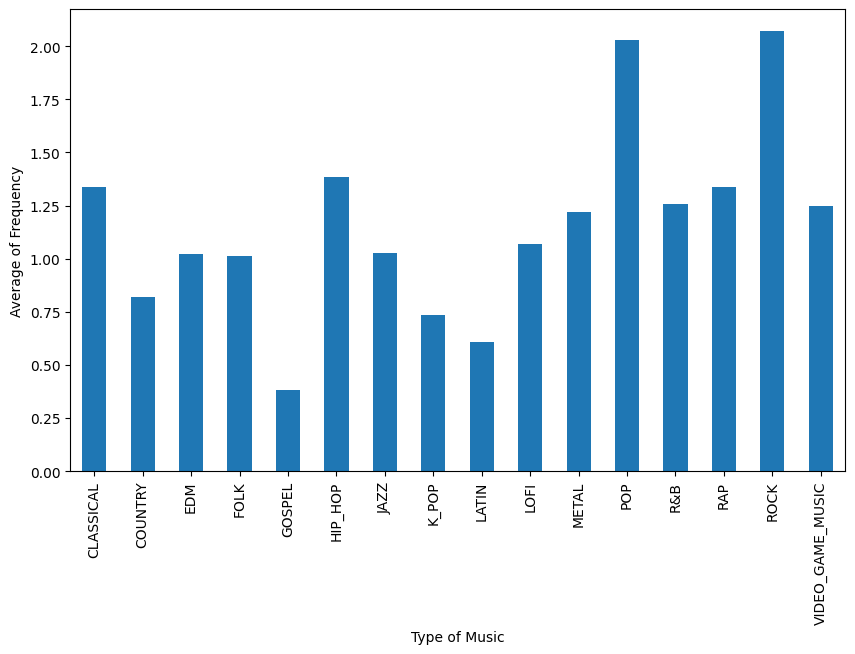

In [100]:
mean_groups_only = original_data_2.copy()
mean_groups_only = mean_groups_only.drop(['AGE','PRIMARY_STREAMING_SERVICE', 'HOURS_PER_DAY', 'WHILE_WORKING', 'INSTRUMENTALIST', 'COMPOSER', 'FAV_GENRE', 'EXPLORATORY', 'FOREIGN_LANGUAGES', 'BLOOD_PRESSURE', 'ANXIETY', 'DEPRESSION', 'INSOMNIA', 'OCD', 'MUSIC_EFFECTS'], axis=1)


average_values = mean_groups_only.mean()
average_values.plot(kind='bar')
plt.xlabel('Type of Music')
plt.ylabel('Average of Frequency')
plt.gcf().set_size_inches((10,6))
plt.show()


Compare to graph of favorite genre

<function matplotlib.pyplot.show(close=None, block=None)>

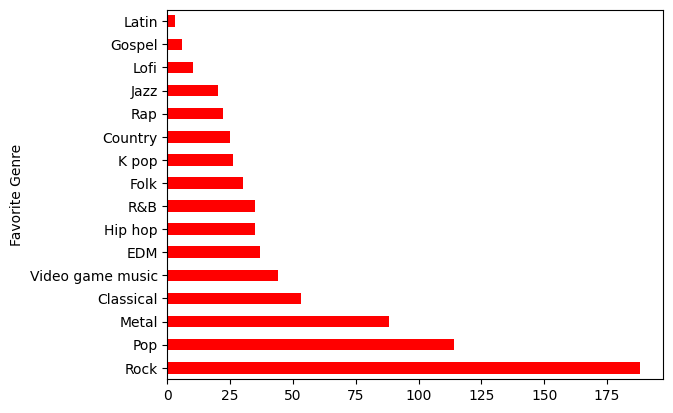

In [101]:
fav_genre = original_data_2['FAV_GENRE'].value_counts(sort=True)
fav_genre.plot(kind='barh', color='red')
plt.ylabel('Favorite Genre')
plt.show

How music effected people by percentage

In [102]:
effects = pd.DataFrame(original_data_2['MUSIC_EFFECTS'].value_counts())
effects = effects.reset_index()
total = 736
effects['percentage'] = round((effects['count'] / total) *100, 2)   
effects              

,MUSIC_EFFECTS,count,percentage
0,Improve,542,73.64
1,No effect,177,24.05
2,Worsen,17,2.31


<Axes: xlabel='MUSIC_EFFECTS'>

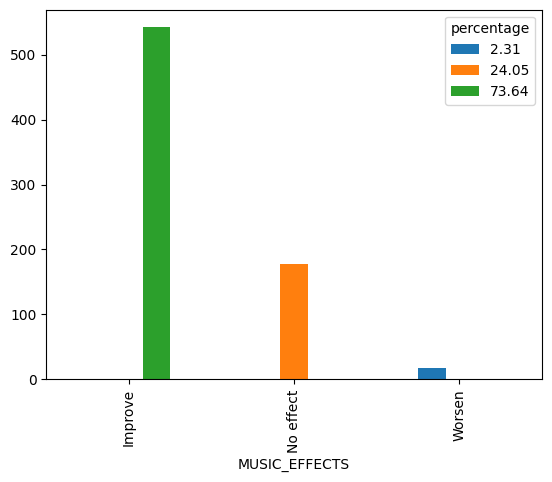

In [103]:
effects_pivot = effects.pivot(index='MUSIC_EFFECTS', columns='percentage', values='count')
effects_pivot.plot(kind='bar')

People who rated their disorder(s) as high (above 5) by percentage, out of 736 people

In [104]:
anxiety = original_data_2[original_data_2.ANXIETY>5].value_counts()
anxiety
high_anxiety = round(444 / 736 * 100, 2)
high_anxiety


60.33

In [105]:
depression = original_data_2[original_data_2.DEPRESSION>5].value_counts()
depression
high_depression = round(344 / 736 * 100, 2)
high_depression

46.74

In [106]:
ocd = original_data_2[original_data_2.OCD>5].value_counts()
ocd
high_ocd = round(131 / 736 *100, 2)
high_ocd

17.8

In [107]:
insomnia = original_data_2[original_data_2.INSOMNIA>5].value_counts()
insomnia
high_insomnia = round(231 / 736 * 100, 2)
high_insomnia

31.39

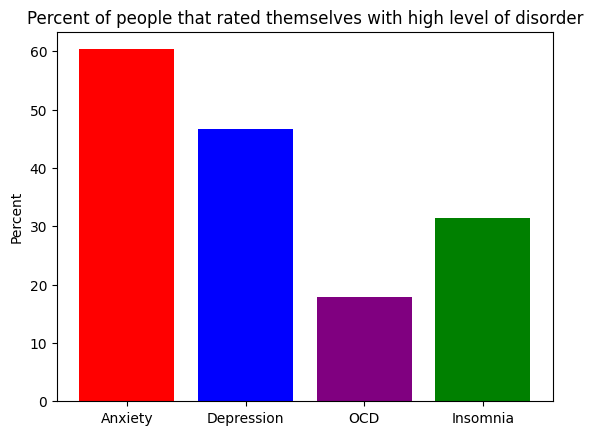

In [108]:
fig, ax = plt.subplots()
issues = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
percents = [high_anxiety, high_depression, high_ocd, high_insomnia]
bar_colors = ['red', 'blue', 'purple', 'green']

ax.bar(issues, percents, color=bar_colors)

ax.set_ylabel('Percent')
ax.set_title('Percent of people that rated themselves with high level of disorder')

plt.show()